## Assessment 1

Marenique Smit 25564285

In [160]:
#preliminaries
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import pandas as pd
import os
from lmfit import Model
backupdir = os.getcwd()

# Question 1

In [161]:
a0b0 = pd.read_csv('A0B0.csv', sep= ',', names=['Time', 'NADPH'])
#varying A and b constant
a0_5b24 = pd.read_csv('A0.5B24.csv', sep= ',', names=['Time', 'NADPH'])
a1b24 = pd.read_csv('A1B24.csv', sep= ',', names=['Time', 'NADPH'])
a2b24 = pd.read_csv('A2B24.csv', sep= ',', names=['Time', 'NADPH'])
a4b24 = pd.read_csv('A4B24.csv', sep= ',', names=['Time', 'NADPH'])
a8b24 = pd.read_csv('A8B24.csv', sep= ',', names=['Time', 'NADPH'])
#varying B and A constant
a8b1_5 = pd.read_csv('A8B1.5.csv', sep= ',', names=['Time', 'NADPH'])
a8b12 = pd.read_csv('A8B12.csv', sep= ',', names=['Time', 'NADPH'])
a8b3 = pd.read_csv('A8B3.csv', sep= ',', names=['Time', 'NADPH'])
a8b6 = pd.read_csv('A8B6.csv', sep= ',', names=['Time', 'NADPH'])
a0_5b24.tail()

Time     NADPH
6   0.06  0.010109
7   0.07  0.013746
8   0.08  0.022254
9   0.09  0.023450
10  0.10  0.024279

<Axes: xlabel='Time', ylabel='NADPH'>

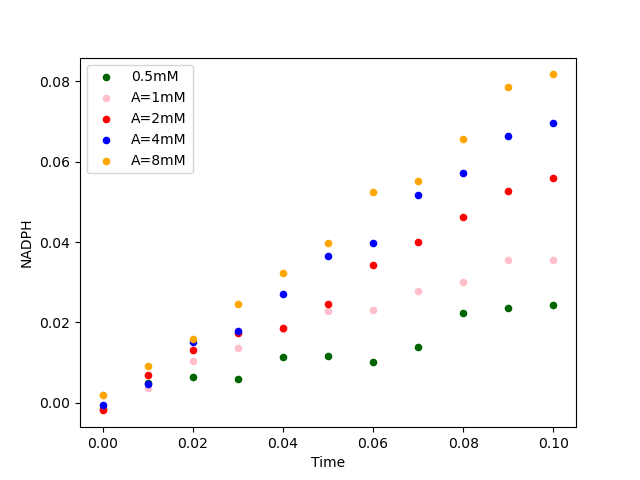

In [162]:
ax = a0_5b24.plot( 'Time', 'NADPH', kind = 'scatter', label = '0.5mM',color='Darkgreen' )
a1b24.plot('Time', 'NADPH', kind = 'scatter', label = 'A=1mM',color='Pink',ax=ax)
a2b24.plot('Time', 'NADPH', kind = 'scatter', label = 'A=2mM',color='Red',ax=ax)
a4b24.plot('Time', 'NADPH', kind = 'scatter', label = 'A=4mM',color='Blue',ax=ax)
a8b24.plot('Time', 'NADPH', kind = 'scatter', label = 'A=8mM',color='Orange',ax=ax)

<Axes: xlabel='Time', ylabel='NADPH'>

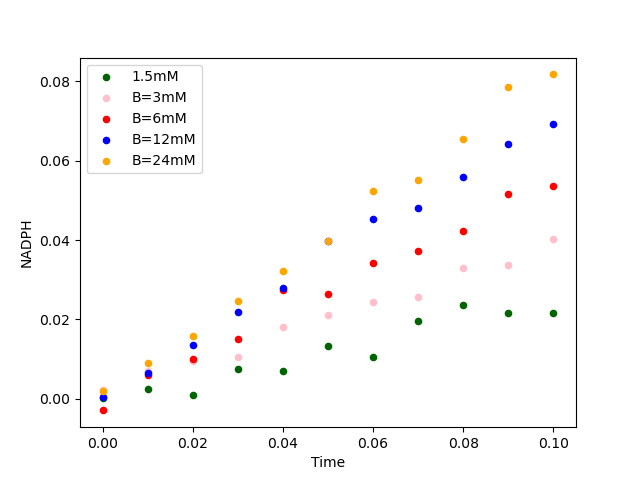

In [163]:
ax = a8b1_5.plot( 'Time', 'NADPH', kind = 'scatter', label = '1.5mM',color='Darkgreen' )
a8b3.plot('Time', 'NADPH', kind = 'scatter', label = 'B=3mM',color='Pink',ax=ax)
a8b6.plot('Time', 'NADPH', kind = 'scatter', label = 'B=6mM',color='Red',ax=ax)
a8b12.plot('Time', 'NADPH', kind = 'scatter', label = 'B=12mM',color='Blue',ax=ax)
a8b24.plot('Time', 'NADPH', kind = 'scatter', label = 'B=24mM',color='Orange',ax=ax)

## Question 2

In [164]:
#Getting linear regressions for each data set
rega0b0 = sp.stats.linregress(a0b0)
#varying A
rega0_5b24 = sp.stats.linregress(a0_5b24)
rega1b24 = sp.stats.linregress(a1b24)
rega2b24 = sp.stats.linregress(a2b24)
rega4b24 = sp.stats.linregress(a4b24)
rega8b24 = sp.stats.linregress(a8b24)
#varying b 
rega8b1_5  = sp.stats.linregress(a8b1_5 )
rega8b3 = sp.stats.linregress(a8b3)
rega8b6 = sp.stats.linregress(a8b6)
rega8b12 = sp.stats.linregress(a8b12)

In [165]:
regressions = [rega0b0,rega0_5b24,rega1b24,rega2b24,rega4b24,rega8b24,rega8b1_5,rega8b3,rega8b6,rega8b12]
irates=[] 
#irates is an emptry list in which the intial rates will be placed
for reg in regressions:
        print(reg.slope)
        irates.append(reg.slope)
irates = np.array(rates)
irates

0.004954646341627728
0.24118661159479945
0.35263044490832535
0.5746500696105541
0.7322856639928835
0.8250788434733142
0.25422083243133853
0.3679535702854621
0.5564088293747242
0.701203980466376


array([0.00495465, 0.24118661, 0.35263044, 0.57465007, 0.73228566,
       0.82507884, 0.25422083, 0.36795357, 0.55640883, 0.70120398])

## Question 3

In [166]:
concsA =np.array([0,0.5,1,2,4,8,8,8,8,8])  
concsB = np.array([0,24,24,24,24,24,1.5,3,6,12])  

#DF is the combined dataframe 
Df =pd.DataFrame({'A':concsA,'B':concsB,'rate':irates})
Df

A     B      rate
0  0.0   0.0  0.004955
1  0.5  24.0  0.241187
2  1.0  24.0  0.352630
3  2.0  24.0  0.574650
4  4.0  24.0  0.732286
5  8.0  24.0  0.825079
6  8.0   1.5  0.254221
7  8.0   3.0  0.367954
8  8.0   6.0  0.556409
9  8.0  12.0  0.701204

## Question 4

In [167]:
def v(A,B,Ka,Kb,Vf):
    return (Vf*A*B)/((Ka+A)*(Kb+B))

In [168]:
mymod = Model(v, independent_vars=['A', 'B'])
mypar = mymod.make_params(Ka=1,Kb=1,Vf=1)
#we are assigning the values for the paramaters.
myfit = mymod.fit(Df.rate, mypar, A=Df.A , B=Df.B )
myfit
#units vf = M/s
#Ks = 1/M*s
#Kb = 1/M*s

## Question 5

In [169]:
B_constant=Df[Df.B==24]
A_constant=Df[Df.A==8]
print(B_constant)
print(A_constant)

     A     B      rate
1  0.5  24.0  0.241187
2  1.0  24.0  0.352630
3  2.0  24.0  0.574650
4  4.0  24.0  0.732286
5  8.0  24.0  0.825079
     A     B      rate
5  8.0  24.0  0.825079
6  8.0   1.5  0.254221
7  8.0   3.0  0.367954
8  8.0   6.0  0.556409
9  8.0  12.0  0.701204


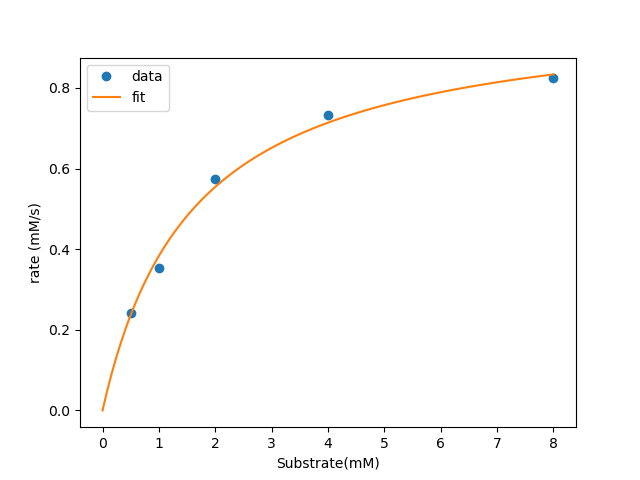

In [170]:
s = np.linspace(0,8,101)
fig, ax = plt.subplots()
ax.plot(B_constant.A, B_constant.rate,'o', label='data')# experimental data
ax.plot(s, myfit.eval(A= s, B = 24), label='fit')# fitted model
ax.set_xlabel('Substrate(mM)')
ax.set_ylabel('rate (mM/s)')
ax.legend(loc='best')

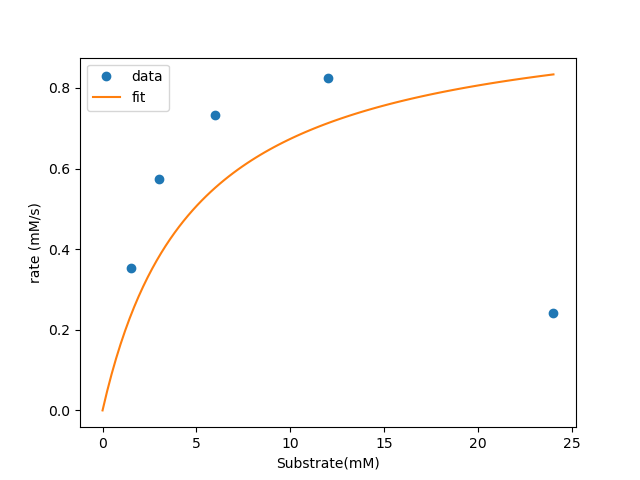

In [171]:
s1= np.linspace(0,24,101)
fig, ax = plt.subplots()
ax.plot(A_constant.B, B_constant.rate,'o', label='data')# experimental data
ax.plot(s1, myfit.eval(B = s1, A= 8), label='fit')# fitted model
ax.set_xlabel('Substrate(mM)')
ax.set_ylabel('rate (mM/s)')
ax.legend(loc='best')